# Boston House Prices using Linear Regression

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Visualizing the data :

In [2]:
boston = load_boston()
#Y = load_boston().target

df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


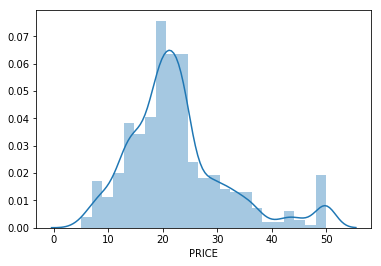

In [6]:
df['PRICE'] = boston.target

sns.distplot(df['PRICE'])

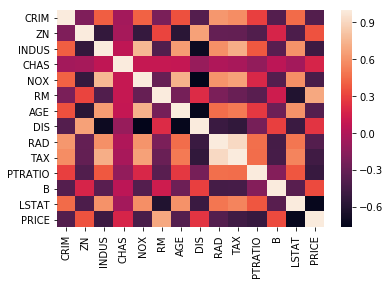

In [7]:
sns.heatmap(df.corr())

## Linear Regression using sklearn library: 

In [8]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
y = df['PRICE']
y = y.values.reshape(506,1)

In [9]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,random_state = 0, test_size = 0.3)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_ss = sc.fit_transform(X_train)
X_test_ss = sc.transform(X_test)

In [11]:
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train_ss, y_train)
print(mean_squared_error(y_test, clf.predict(X_test_ss)))

28.417260557724077


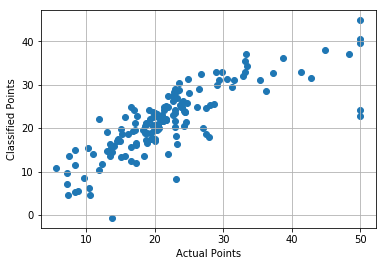

In [12]:
import matplotlib.pyplot as plt
plt.scatter(y_test, clf.predict(X_test_ss))
plt.ylabel('Classified Points')
plt.xlabel('Actual Points')
plt.grid()
plt.show()

## SGD using function :

In [28]:
def sgd_fit(x, y, learning_rate, epochs):
    slope = np.random.normal(loc = 0.0 ,scale =1.0 ,size = (x.shape[1],))
    intercept = 0.0
    
    # set the number of observations in the data
    N = (len(x))

    # loop over the number of epochs
    for i in range(epochs):
        error = []
        
        for j in range(len(x)):
            # calculate our current predictions
            predictions = np.array(x[j])* slope + intercept
            err = y[j] - predictions
            error.append(err)
            # calculate the sum of squared errors
            #error = sum([data**2 for data in (y-predictions)]) / 
        
        
        slope = slope - learning_rate *((-2/N)*x.dot(error))
        intercept = intercept - learning_rate*((-2/N)*np.sum(error))

        # update the slope and intercept
        #slope = slope - (learning_rate * slope_gradient)
        #intercept = intercept - (learning_rate * intercept_gradient)

    return predictions, intercept, slope

In [142]:
# inspired by:- https://datadan.io/ai-building-blocks-from-scratch-with-python
#predictions, intercept, slope = sgd_fit(X_train_ss, y_train, 0.0001, 1000)
slope, intercept = sgd(X_train_ss, y_train, 800 ,0.0001)
print("Best intercept is :-", intercept)
print("\n")
print("The slopes are :- ", slope)

Best intercept is :- 19.904750048009355


The slopes are :-  [[-0.85530936 -0.65587785 -1.44411094 -0.96698173  0.04473791 -0.52255761
   0.09885386 -0.58448294 -0.56425507 -1.00965283 -0.51630119  0.06111753
   0.60220411]
 [-0.42399032 -0.10377685 -1.36938859 -0.60329499  1.0211538   0.11028631
   1.10804406  0.01085706  0.04333557 -0.67180903  0.12033182  1.04745342
   1.91623899]
 [-0.95009181 -0.75016788 -1.54034723 -1.06203992 -0.04782218 -0.61651845
   0.00642738 -0.67859668 -0.65831886 -1.10481638 -0.61024658 -0.03140212
   0.51102048]
 [-0.40882909 -0.15390448 -1.16146852 -0.55157503  0.74166216  0.01651298
   0.81083622 -0.06264347 -0.03678706 -0.60611963  0.02451029  0.76259951
   1.45424693]
 [-0.86132559 -0.65776118 -1.46232916 -0.9753122   0.05737375 -0.52167809
   0.11261117 -0.58488672 -0.56423965 -1.01886759 -0.51529201  0.07409281
   0.62639256]
 [ 0.07031661  0.38197781 -0.84983193 -0.10419919  1.47686376  0.59032376
   1.56143335  0.49355007  0.52516114 -0.17088336 

In [137]:
#testing

pre_y = X_test_ss.dot(slope) + intercept
err = y_test - pre_y
MSE = (np.sum(err**2)/X_test_ss.shape[0])
print("MSE is",MSE)

MSE is 28.111862957877225


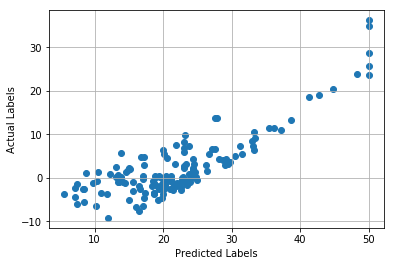

In [140]:
plt.scatter(y_test, err.T[12])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.grid()
plt.show()

<h1>CONCLUSION:-</h1>

In [141]:
from prettytable import PrettyTable
x = PrettyTable()
x.add_column("SL",[1,2])
x.add_column("Implementation",["Linear Regression with sklearn","GD Regressor without sklearn"])
x.add_column("MSE",[28.02602759792611,28.111862957877225])
print(x)

+----+--------------------------------+--------------------+
| SL |         Implementation         |        MSE         |
+----+--------------------------------+--------------------+
| 1  | Linear Regression with sklearn | 28.02602759792611  |
| 2  |  GD Regressor without sklearn  | 28.111862957877225 |
+----+--------------------------------+--------------------+
